In [11]:
import os
import numpy as np
import pickle
import matplotlib.cm
from matplotlib import pyplot as plt

results_dir = os.path.join('.', 'results')
machine_dirs = ['google_scaaml_gridsearch__%d_cuda:%d'%(idx, idx) for idx in range(3)]
trial_dirs = [
    os.path.join(results_dir, machine_dir, trial_dir)
    for machine_dir in machine_dirs
    for trial_dir in os.listdir(os.path.join(results_dir, machine_dir))
]

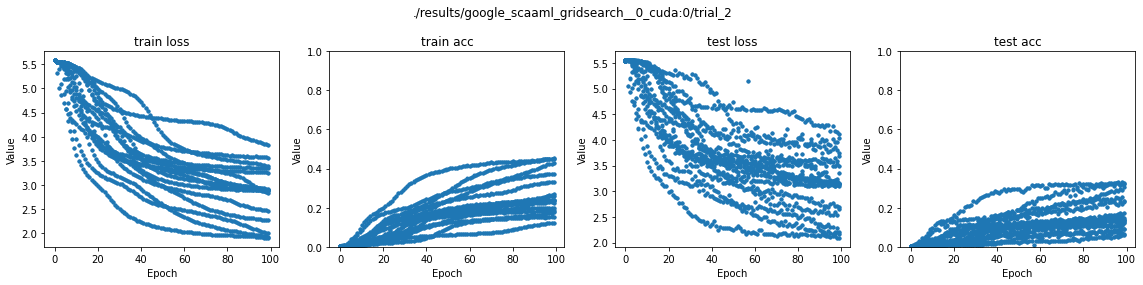

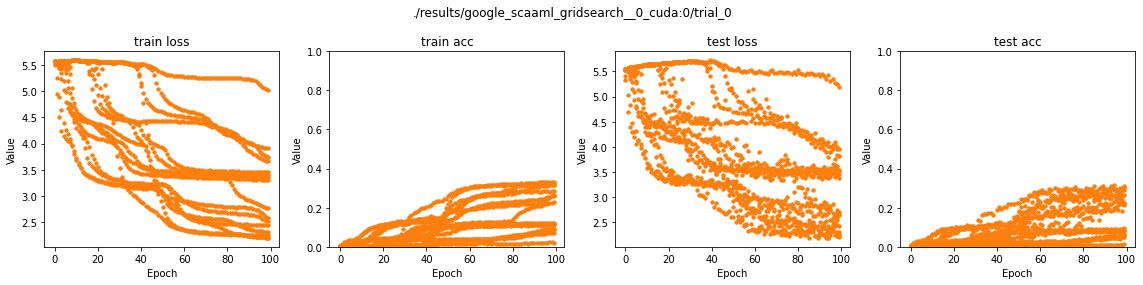

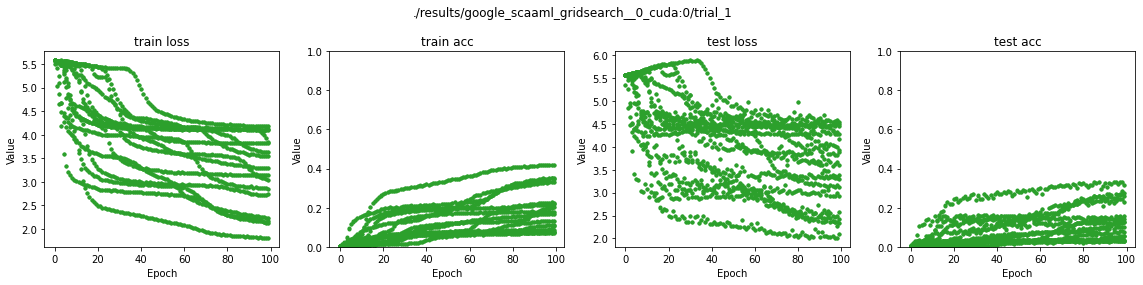

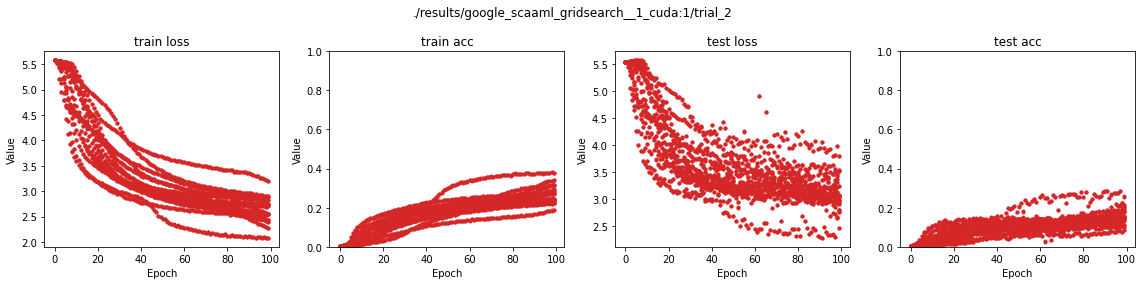

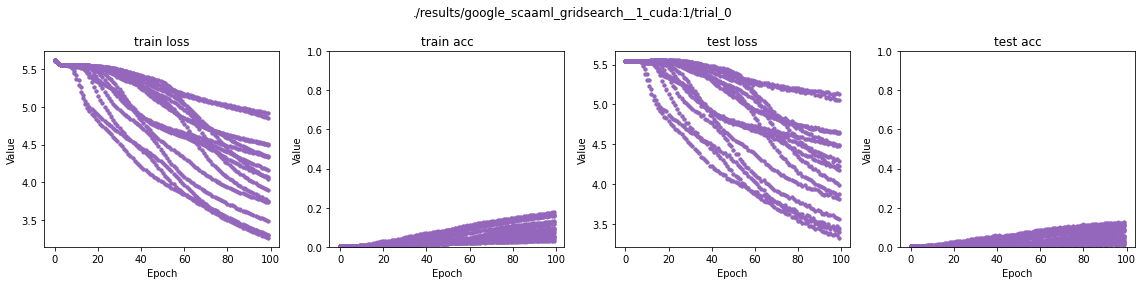

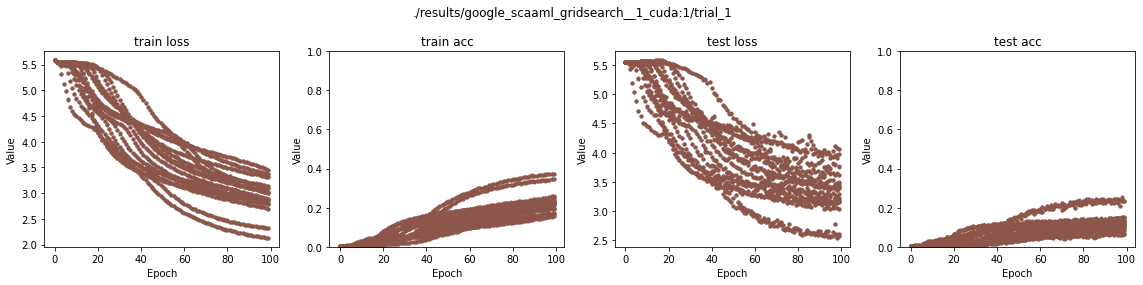

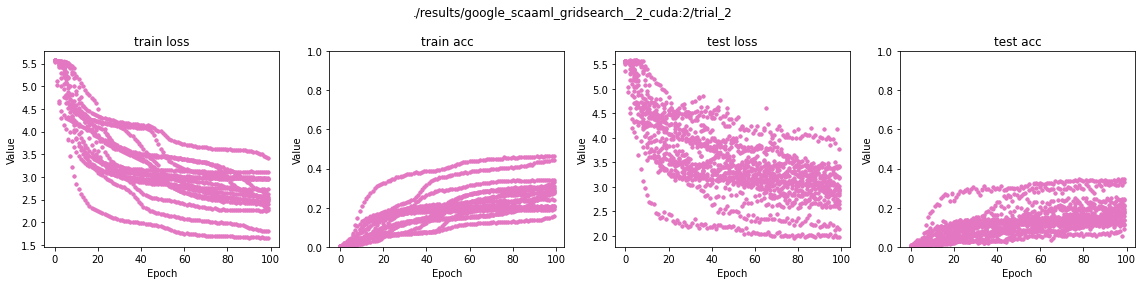

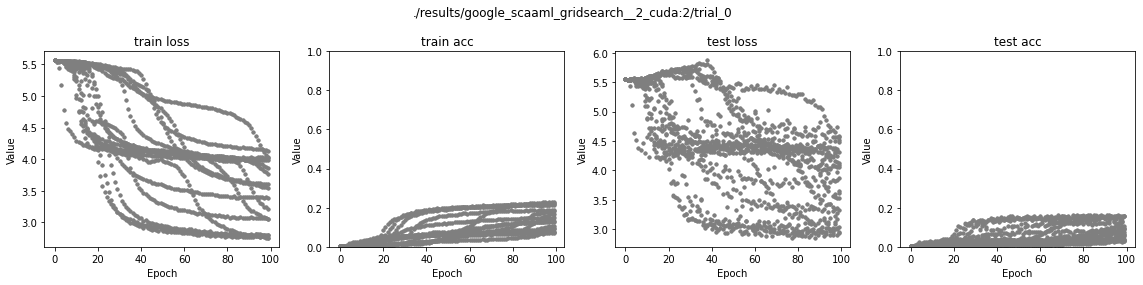

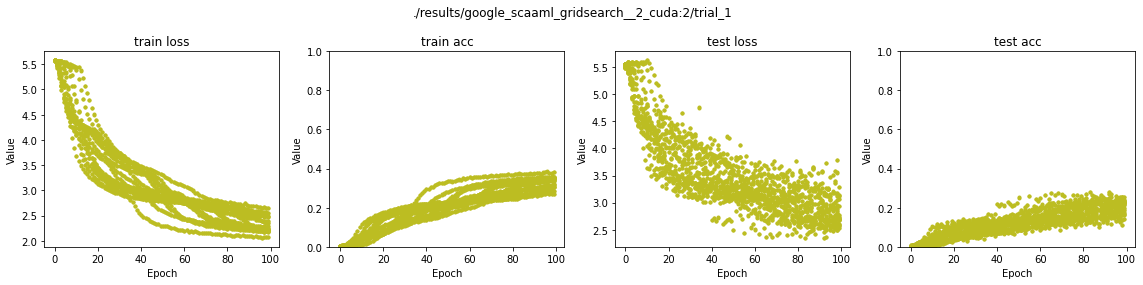

In [22]:
colormap = matplotlib.cm.get_cmap('tab10')
colors = [colormap(idx) for idx, _ in enumerate(trial_dirs)]

for trial_dir, color in zip(trial_dirs, colors):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(trial_dir)
    with open(os.path.join(trial_dir, 'results.pickle'), 'rb') as F:
        results = pickle.load(F)
    for ax, metric, phase in zip(axes.flatten(), ('loss', 'acc', 'loss', 'acc'), ('train', 'train', 'test', 'test')):
        traces = []
        for key in results.keys():
            if not metric in key:
                continue
            if not phase in key:
                continue
            if 'total' in key:
                continue
            traces.append(results[key])
        traces = np.array(traces).transpose()
        ax.plot(range(100), traces, '.', color=color)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Value')
        ax.set_title('{} {}'.format(phase, metric))
        if metric == 'acc':
            ax.set_ylim(0, 1)
    plt.tight_layout()